## 1. Prediction - Frequency Analysis of the Most Frequently Drawn Number Since the Start of Records - aka Hot Numbers approach

### About this Method and the assumption we have behind it:
- There are Numbers which have been drawn slightly more than others
- We try our Luck and pick the 6 most frequently Drawn Numbers
- We do the same for the Superzahl

For our 1 Prediction (remember we play 6 Fields per Lottery tickey á 6 Numbers + 1 Superzahl (for the whole Ticket Superzahl can only be selected once))


In [24]:
# Import Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import pickle

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### Load the Data we Stored in the data Folder with Notebook 1

In [25]:

# Load the CSV file into a DataFrame
frequency_data = pd.read_csv("data/frequency_data.csv")
superzahl_data = pd.read_csv("data/superzahl_data.csv")

### Have a Look at the Dataframe and see what Feature Engineering we need

In [26]:
frequency_data.head()

,id,date,Lottozahl,Superzahl
0,1,09.10.1955,"[3, 12, 13, 16, 23, 41]",NaN
1,2,16.10.1955,"[3, 12, 18, 30, 32, 49]",NaN
2,3,23.10.1955,"[12, 14, 23, 24, 34, 36]",NaN
3,4,30.10.1955,"[4, 13, 23, 30, 36, 44]",NaN
4,5,06.11.1955,"[5, 6, 31, 39, 44, 49]",NaN


In [27]:
# date and Lottozahl are Objects we cast them to Datetime and Int
frequency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4798 non-null   int64  
 1   date       4798 non-null   object 
 2   Lottozahl  4798 non-null   object 
 3   Superzahl  2912 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 150.1+ KB


### We See Lottozahl is a String looking like 1 List - we will handle this in the process


PLEASE RUN EACH LINE ONLY ONCE OTHERWISE U WILL RUN INTO AN ERROR FOR THE TRANSFORMING WE DO HERE since it can not be applied twice

In [28]:
# Convert the string representations of lists to lists
frequency_data["Lottozahl"] = frequency_data["Lottozahl"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# define lotto_numbers this will make a 1 column DF with 6* same Index for 1 drawing
# So 6 rows for each drawing in this column now 
lotto_numbers = frequency_data["Lottozahl"].explode().astype(int)
lotto_numbers_count = lotto_numbers.value_counts().sort_values(ascending=False)

# Counting Values drawn of Superzahl and order then by most frequent
superzahl_counts = superzahl_data["Superzahl"].astype(int).value_counts().sort_values(ascending=False)

# Plot our Numbers Drawn with Countplots

### For Lottozahlen

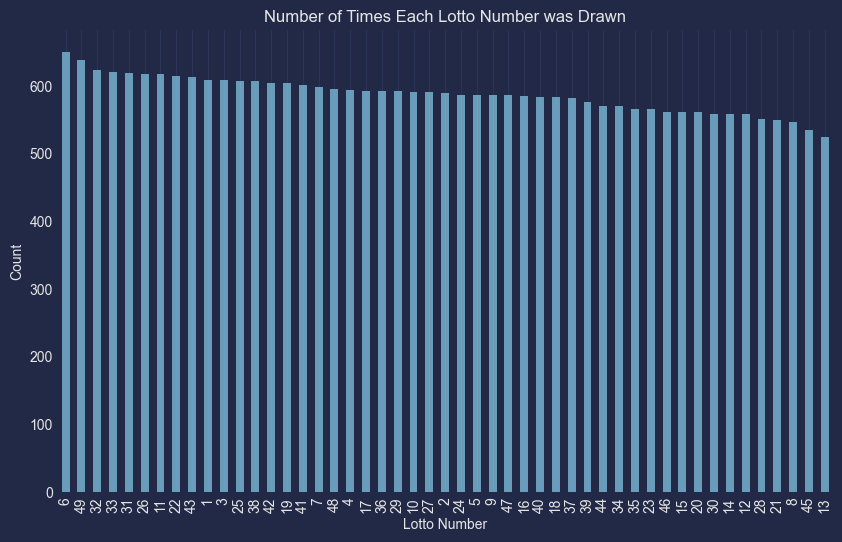

In [29]:
# Plot Lottozahl counts
plt.figure(figsize=(10, 6))
lotto_numbers_count.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Times Each Lotto Number was Drawn')
plt.xlabel('Lotto Number')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Just Display them in a Readable Format for Checking

In [30]:
# Readable Format
print("Amount of Drawn per Number:", lotto_numbers_count)

Amount of Drawn per Number: Lottozahl
6     650
49    638
32    624
33    620
31    619
26    618
11    617
22    615
43    613
1     609
3     609
25    608
38    607
42    604
19    604
41    602
7     598
48    595
4     594
17    593
36    592
29    592
10    591
27    591
2     589
24    587
5     587
9     587
47    586
16    585
40    584
18    583
37    582
39    576
44    571
34    571
35    566
23    566
46    562
15    561
20    561
30    559
14    558
12    558
28    551
21    549
8     547
45    535
13    524
Name: count, dtype: int64


### For the Superzahl

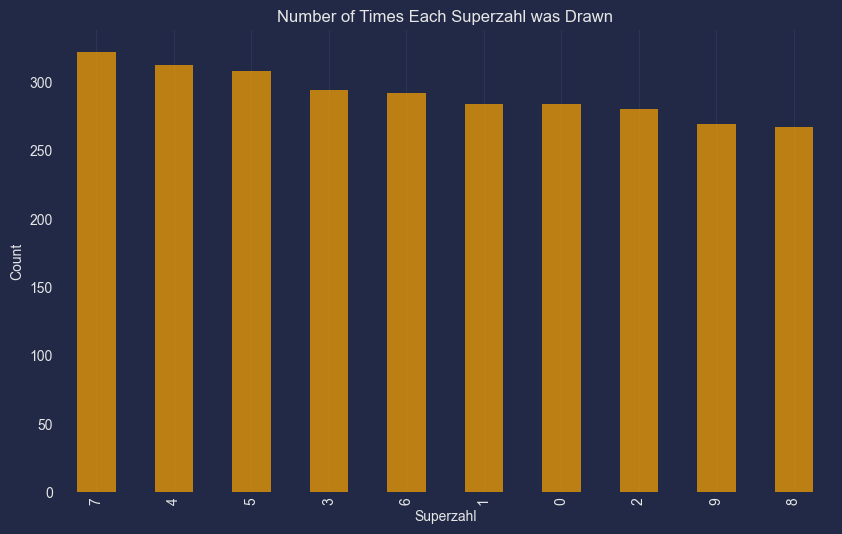

In [31]:
# Plot Superzahl counts
plt.figure(figsize=(10, 6))
superzahl_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Times Each Superzahl was Drawn')
plt.xlabel('Superzahl')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [32]:
# Readable Format
print("Superzahl drawn by Number:",superzahl_counts)

Superzahl drawn by Number: Superzahl
7    322
4    312
5    308
3    294
6    292
1    284
0    284
2    280
9    269
8    267
Name: count, dtype: int64


# Predictions for the 1 Lottery Ticket Field!

### DISCLAIMER:
- This is a Fun Project to Showcase some IT Skills
- Lottery is a total statistically Random Game
- Do not use or let you inspire by this Prediction!
- Gambling can make you addicted! Only Play with Caution!
- I claim no rights, that my outputs would even be near the drawn Numbers

### About the Predictions:
- In Field 1 we go for the Most Frequent Numbers each Lottery Ticket we play
- The Superzahl only appears once per Lottery Ticket - we will Take 7, 5 and 4 randomly for each Ticket
- This is a common Lottery Strategy - even if you win with this Numbers, you would have to share the Prize Pool with many other People
- We will do more complex Prediction Strategies in later Notebooks
- This prediction will be the same for several Weeks till another number gets into Top 6

In [33]:
# Format the first 6 Numbers for better Output
first_six_numbers = lotto_numbers_count.head(6)
formatted_numbers = ', '.join(map(str, first_six_numbers.index))

# Format the Output of the Superzahl
superzahl_number = superzahl_counts.head(1)


# Print your Lucky Numbers
print("Your Lucky Numbers For Field 1(Frequency Analysis):",formatted_numbers," Superzahl:", np.random.choice([4,7,5]))

Your Lucky Numbers For Field 1(Frequency Analysis): 6, 49, 32, 33, 31, 26  Superzahl: 4


## Optional - Store the Numbers for BONUS Notebook 8 in the End!!!

In [34]:
# Store the List in a Pickle file

with open("stored_predictions/hot_numbers.pickle", "wb") as f:
    pickle.dump(formatted_numbers, f)